There are 4 total categories.
['vitaminA', 'vitaminB', 'vitaminD', 'vitamink']
There are 94 total  images.

There are 47 training images.
There are 47 test images.


100%|█████████████████████| 47/47 [00:00<00:00, 226.17it/s]


Epoch 1/100
4/4 [==============================] - 1s 137ms/step - loss: 1.6236 - accuracy: 0.1875 - val_loss: 1.4036 - val_accuracy: 0.4000
Epoch 2/100
4/4 [==============================] - 0s 56ms/step - loss: 1.5986 - accuracy: 0.2500 - val_loss: 1.4508 - val_accuracy: 0.2667
Epoch 3/100
4/4 [==============================] - 0s 57ms/step - loss: 1.5239 - accuracy: 0.3125 - val_loss: 1.5913 - val_accuracy: 0.1333
Epoch 4/100
4/4 [==============================] - 0s 55ms/step - loss: 1.4846 - accuracy: 0.3438 - val_loss: 1.4290 - val_accuracy: 0.2667
Epoch 5/100
4/4 [==============================] - 0s 56ms/step - loss: 1.4851 - accuracy: 0.3125 - val_loss: 1.4855 - val_accuracy: 0.1333
Epoch 6/100
4/4 [==============================] - 0s 68ms/step - loss: 1.3731 - accuracy: 0.3438 - val_loss: 1.3677 - val_accuracy: 0.3333
Epoch 7/100
4/4 [==============================] - 0s 60ms/step - loss: 1.2883 - accuracy: 0.4688 - val_loss: 1.3832 - val_accuracy: 0.2667
Epoch 8/100
4/4 [==

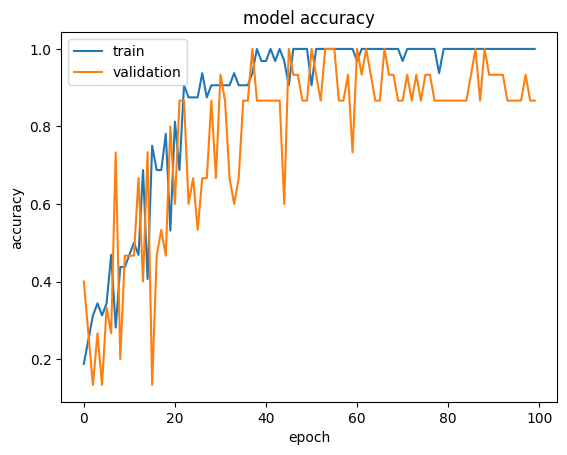

2/2 [==============================] - 0s 34ms/step
[[14  0  0  0]
 [ 0 10  0  0]
 [ 0  0 12  0]
 [ 0  0  2  9]]
Accuracy=100.0


C:\Users\AislynPC\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [4]:
from sklearn.datasets import load_files       
from keras.utils import to_categorical
import numpy as np
from glob import glob


tar=6
path='./dataset/'
# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets =to_categorical(np.array(data['target']), tar)
    return files, targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset(path)

test_files=train_files
test_targets = train_targets

# get the burn classes
# We only take the characters from a starting position to remove the path
#burn_classes = [item[11:-1] for item in sorted(glob(path))]
burn_classes = [item[10:-1] for item in sorted(glob("./dataset/*/"))]
# print statistics about the dataset
print('There are %d total categories.' % len(burn_classes))
print(burn_classes)
print('There are %s total  images.\n' % len(np.hstack([train_files, test_files])))
print('There are %d training images.' % len(train_files))
print('There are %d test images.'% len(test_files))

for file in train_files: assert('.DS_Store' not in file)



from tensorflow.keras.preprocessing import image                  
from tqdm import tqdm

# Note: modified these two functions, so that we can later also read the inception tensors which 
# have a different format 
def path_to_tensor(img_path, width=224, height=224):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(width, height))
    # convert PIL.Image.Image type to 3D tensor with shape (width, heigth, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, width, height, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths, width=224, height=224):
    list_of_tensors = [path_to_tensor(img_path, width, height) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

import keras
import timeit

# graph the history of model.fit
def show_history_graph(history):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
   


from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255


from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint 

import matplotlib.pyplot as plt

img_width, img_height = 224, 224
batch_size = 4
epoch=100

########

img_width, img_height = img_width, img_height
batch_size = 32
samples_per_epoch = 40
validation_steps = 40
nb_filters1 = 32
nb_filters2 = 64
conv1_size = 3
conv2_size = 3
pool_size = 3
lr = 0.0004
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, Activation
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras import callbacks
import time
#input_shape=(img_width, img_height,3)
model = Sequential()
model.add(Convolution2D(nb_filters1, conv1_size, conv1_size, padding='same', input_shape=(img_width, img_height, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Convolution2D(nb_filters2, conv2_size, conv2_size, padding='same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(tar, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=lr),
              metrics=['accuracy'])

hist=model.fit(train_tensors, train_targets ,validation_split=0.3, epochs=epoch, batch_size=10)

show_history_graph(hist)
test_loss, test_acc = model.evaluate(train_tensors, train_targets)

y_pred=model.predict(train_tensors)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,recall_score
cm = confusion_matrix(np.argmax(train_targets, axis=1),np.argmax(y_pred, axis=1))

from sklearn.metrics import roc_curve
# Calculate ROC curve from y_test and pred

from sklearn.metrics import roc_curve
fpr ,tn, thresholds = roc_curve(np.argmax(test_targets,axis=1)>=1,np.argmax(y_pred,axis=1)>=1)
accuracycnn = accuracy_score(np.argmax(test_targets, axis=1)>=1,np.argmax(y_pred, axis=1)>=1)
print(cm)
print('Accuracy=' +str(accuracycnn*100))




#model.save('color_trained_modelDNN.h5')
model.save('trained_model_DNN1.h5')




